# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
----
This portion of the program generates a list of random cities using Citipy.

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Gathering Data from the Open Weather API

In [4]:
# create empty lists to store data for dataframe
city_list = []
latitude = []
longitude = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

In [32]:
print('Beginning Data Retrieval')
print('-----------------------------')

#create query url for loop
units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

# loop through cities to collect currect weather data
for city in cities:
    # Create search query, make request and store in json
    response_json = requests.get(query_url + city).json()
    
    # attempt to grab weather data from the cities
    try:
        latitude.append(response_json['coord']['lat'])
        longitude.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        city_list.append(city)
        #mass.append(response_json['results'][0]['mass'])
        print(f'Processing Record {cities.index(city)}| {city}')
        
    # exceptions for a cities not found or errors
    except:
        print(f'{city} not found. Skipping.')
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 0| mar del plata
Processing Record 1| kaitangata
belushya guba not found. Skipping.
Processing Record 3| tuktoyaktuk
Processing Record 4| bredasdorp
Processing Record 5| sooko
Processing Record 6| khatanga
Processing Record 7| pitimbu
Processing Record 8| geraldton
Processing Record 9| upernavik
Processing Record 10| mataura
Processing Record 11| port hardy
Processing Record 12| hilo
Processing Record 13| shetpe
Processing Record 14| kapiri mposhi
Processing Record 15| castro
Processing Record 16| rikitea
Processing Record 17| sinnamary
Processing Record 18| nome
Processing Record 19| bathsheba
Processing Record 20| thompson
Processing Record 21| vaini
Processing Record 22| beringovskiy
Processing Record 23| carnarvon
Processing Record 24| muroto
Processing Record 25| xining
Processing Record 26| atuona
Processing Record 27| shanghai
Processing Record 28| chapais
Processing Record 29| hirara
Processing Record 30| 

Processing Record 256| arlit
Processing Record 257| buraydah
viligili not found. Skipping.
Processing Record 259| leningradskiy
Processing Record 260| hays
Processing Record 261| makat
Processing Record 262| wellington
Processing Record 263| solnechnyy
Processing Record 264| araouane
Processing Record 265| mazabuka
Processing Record 266| tilichiki
Processing Record 267| petropavlovsk-kamchatskiy
Processing Record 268| naze
Processing Record 269| berlevag
Processing Record 270| victoria
Processing Record 271| wewak
zachagansk not found. Skipping.
Processing Record 273| lubango
Processing Record 274| saint-georges
Processing Record 275| madaoua
Processing Record 276| bonavista
Processing Record 277| kilindoni
Processing Record 278| monrovia
Processing Record 279| semey
Processing Record 280| kankon
Processing Record 281| yellowknife
dekoa not found. Skipping.
Processing Record 283| pangody
Processing Record 284| mehamn
Processing Record 285| puerto baquerizo moreno
Processing Record 286|

Processing Record 512| palmer
Processing Record 513| lumphat
samusu not found. Skipping.
Processing Record 515| rundu
Processing Record 516| dali
Processing Record 517| goure
Processing Record 518| khasan
Processing Record 519| denpasar
Processing Record 520| fuerte olimpo
Processing Record 521| toksovo
yefira not found. Skipping.
Processing Record 523| margate
Processing Record 524| dingtao
Processing Record 525| quesnel
Processing Record 526| barra
Processing Record 527| alekseyevskoye
Processing Record 528| ambilobe
Processing Record 529| along
Processing Record 530| abha
Processing Record 531| caucaia
Processing Record 532| daru
Processing Record 533| prince rupert
Processing Record 534| kloulklubed
Processing Record 535| plouzane
Processing Record 536| kyshtovka
Processing Record 537| jacareacanga
Processing Record 538| aleksandrov gay
Processing Record 539| linxia
Processing Record 540| karasjok
Processing Record 541| annino
Processing Record 542| grand gaube
Processing Record 54

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Create DataFrame
weather_data = pd.DataFrame({
    'City': city_list,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature (F)': temp,
    'Max Temp (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed
})

#set the city to the index and display
weather_data = weather_data.set_index('City')
weather_data.head(10)

,Latitude,Longitude,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
City,,,,,,,
mar del plata,-38.0023,-57.5575,33.82,33.82,80,0,5.75
kaitangata,-46.2817,169.8464,56.91,56.91,67,100,6.29
tuktoyaktuk,69.4541,-133.0374,53.60,53.60,66,75,9.22
bredasdorp,-34.5322,20.0403,36.72,36.72,93,0,2.30
sooko,-7.9097,111.6599,78.66,78.66,61,66,9.04
khatanga,71.9667,102.5000,52.14,52.14,72,100,17.02
pitimbu,-7.4706,-34.8086,73.99,73.99,89,32,8.57
geraldton,-28.7667,114.6000,61.21,61.21,67,40,9.22
upernavik,72.7868,-56.1549,44.40,44.40,77,100,6.26


## Remove any cities where the humidity > 100%.

In [34]:
clean_weather_data = weather_data.loc[(weather_data['Humidity (%)'] < 100),:]

#export clean data to csv
clean_weather_data.to_csv('../Output/clean_weather_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### Insights
- As you move closer to a latitude of 20 degrees, the more likely you are to experiance higher tempertatures. 
- The data is not centered around the equator due to the tilt in the earth's axis. 

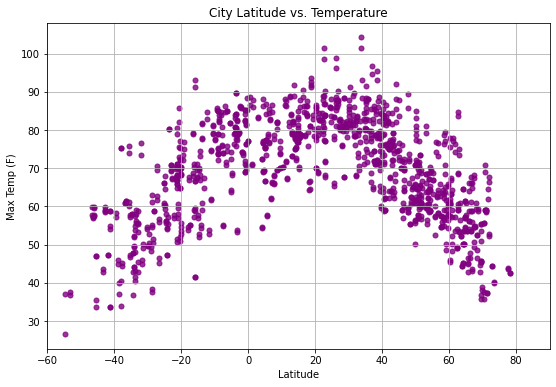

In [35]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Max Temp (F)', grid=True, figsize=(9,6),
              title='City Latitude vs. Temperature', s=25, alpha=0.8, xlim=(-60,90),color='purple')

plt.savefig('../Output/lat_v_temp', pad_inches=0.1, facecolor='w')
#plt.show()

## Latitude vs. Humidity Plot

#### Insights
- There appears to no significant correlation between humidity and latitude. 
- This is a slight increase in variation as you move away from the equator. However, this may be caused by the geography of the world rather than a trend in weather patterns. 

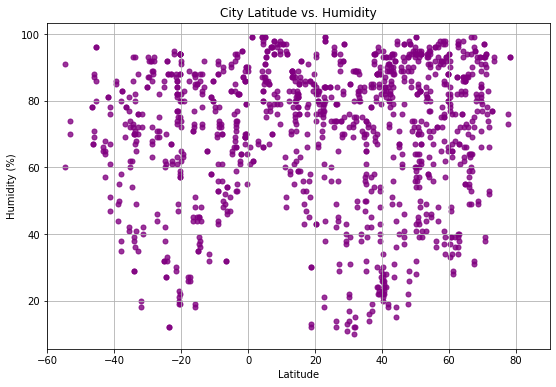

In [36]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Humidity (%)', grid=True, figsize=(9,6),
              title='City Latitude vs. Humidity', s=25, alpha=0.8, xlim=(-60,90), color='purple')

plt.savefig('../Output/lat_v_humidity', pad_inches=0.1, facecolor='w')
#plt.show()

## Latitude vs. Cloudiness Plot

#### Insights
- There appears to no significant correlation between cloudiness and latitude. 

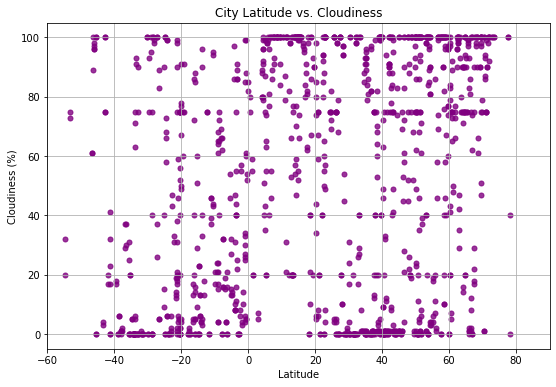

In [37]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', grid=True, figsize=(9,6),
              title='City Latitude vs. Cloudiness', s=25, alpha=0.8, xlim=(-60,90), color='purple')

plt.savefig('../Output/lat_v_clouds', pad_inches=0.1, facecolor='w')
#plt.show()

## Latitude vs. Wind Speed Plot

#### Insights
- There appears to no significant correlation between humidity and latitude.
- The average global wind speed at the time of data collection appears to be around 7 mph.

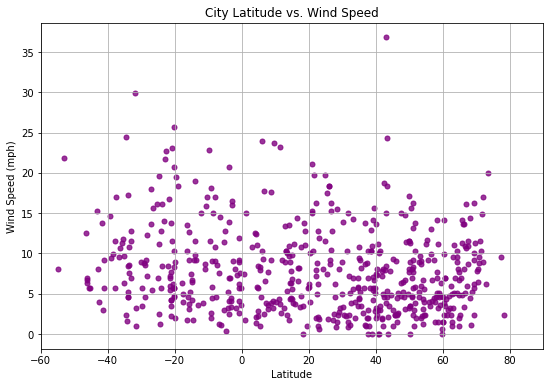

In [28]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', grid=True, figsize=(9,6),
              title='City Latitude vs. Wind Speed', s=25, alpha=0.8, xlim=(-60,90),color='purple')

plt.savefig('../Output/lat_v_wind', pad_inches=0.1, facecolor='w')
#plt.show()

## Linear Regression

In [29]:
#create dataframes for Northen and Southern Hemispheres
n_hemi = clean_weather_data.loc[(clean_weather_data['Latitude'] > 0),:]
s_hemi = clean_weather_data.loc[(clean_weather_data['Latitude'] < 0),:]


In [30]:
# create a function for create the scatter plot
def quick_scatter(x_series, y_series, region):
    #plot scatter
    y_label = y_series.name
    plt.scatter(x_series,y_series)
    plt.xlabel('Latitude')
    plt.ylabel(y_series.name)
    plt.title(f'{y_series.name} v.s Latitude in the {region}ern Hemisphere')
    #gather regression data
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_series, y_series)
    regress_values = x_series * slope + intercept
    plt.plot(x_series,regress_values,color="red")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.show()
    print(f'line of best fit: {line_eq}.')
    print(f'correlation: {rvalue}')
    print('-----------------------------')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

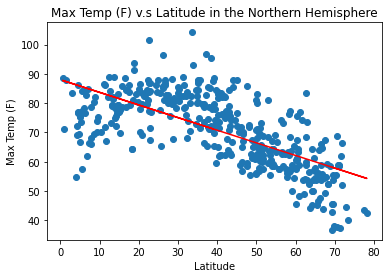

line of best fit: y = -0.43x +88.01.
correlation: -0.6755148885039503
-----------------------------


In [31]:
quick_scatter(n_hemi['Latitude'],n_hemi['Max Temp (F)'], 'North')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

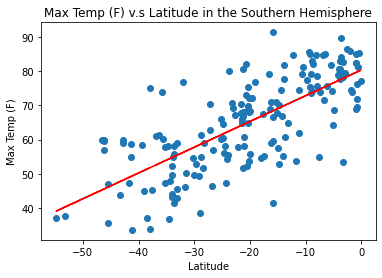

line of best fit: y = 0.75x +80.33.
correlation: 0.7315116860971771
-----------------------------


In [19]:
quick_scatter(s_hemi['Latitude'],s_hemi['Max Temp (F)'], 'South')

### The correlation coefficent of the following scatterplots supports that there is no significant relationship between a city's latitude and it's humidity,  windspeed, or humidity.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

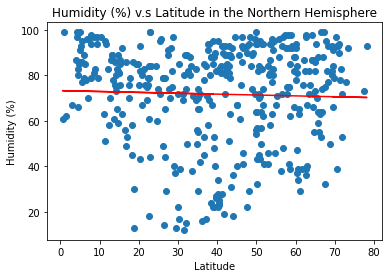

line of best fit: y = -0.04x +73.3.
correlation: -0.03437563855633167
-----------------------------


In [20]:
quick_scatter(n_hemi['Latitude'],n_hemi['Humidity (%)'], 'North')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

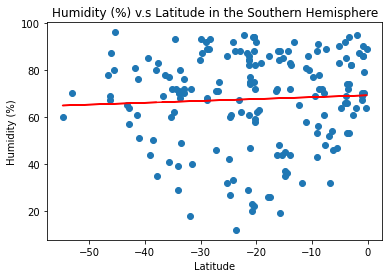

line of best fit: y = 0.08x +69.21.
correlation: 0.05240895815594448
-----------------------------


In [21]:
quick_scatter(s_hemi['Latitude'],s_hemi['Humidity (%)'], 'South')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

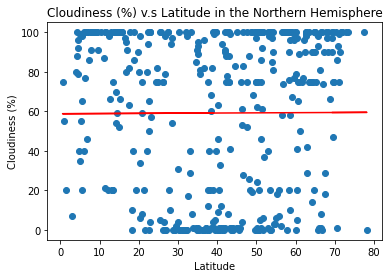

line of best fit: y = 0.01x +58.78.
correlation: 0.004315179751611653
-----------------------------


In [22]:
quick_scatter(n_hemi['Latitude'],n_hemi['Cloudiness (%)'], 'North')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

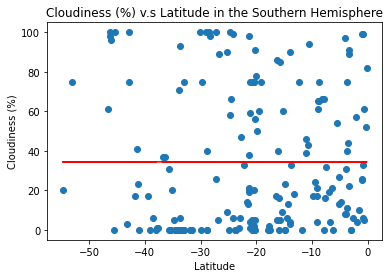

line of best fit: y = -0.0x +34.42.
correlation: -0.00014077274339766594
-----------------------------


In [23]:
quick_scatter(s_hemi['Latitude'],s_hemi['Cloudiness (%)'], 'South')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

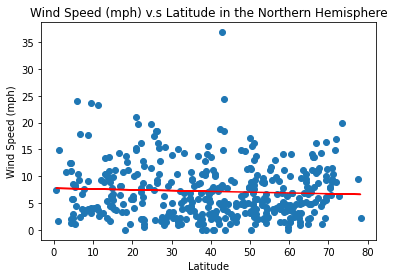

line of best fit: y = -0.01x +7.76.
correlation: -0.05671278143951896
-----------------------------


In [24]:
quick_scatter(n_hemi['Latitude'],n_hemi['Wind Speed (mph)'], 'North')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

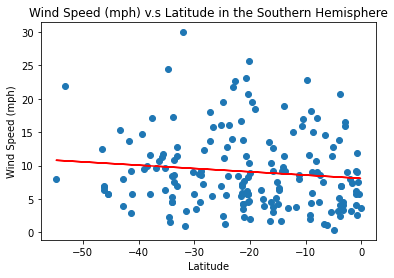

line of best fit: y = -0.05x +8.08.
correlation: -0.11402221351194393
-----------------------------


In [25]:
quick_scatter(s_hemi['Latitude'],s_hemi['Wind Speed (mph)'], 'South')